In [1]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
import paths
from preprocessing import read_csv_clean

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M1.CSV


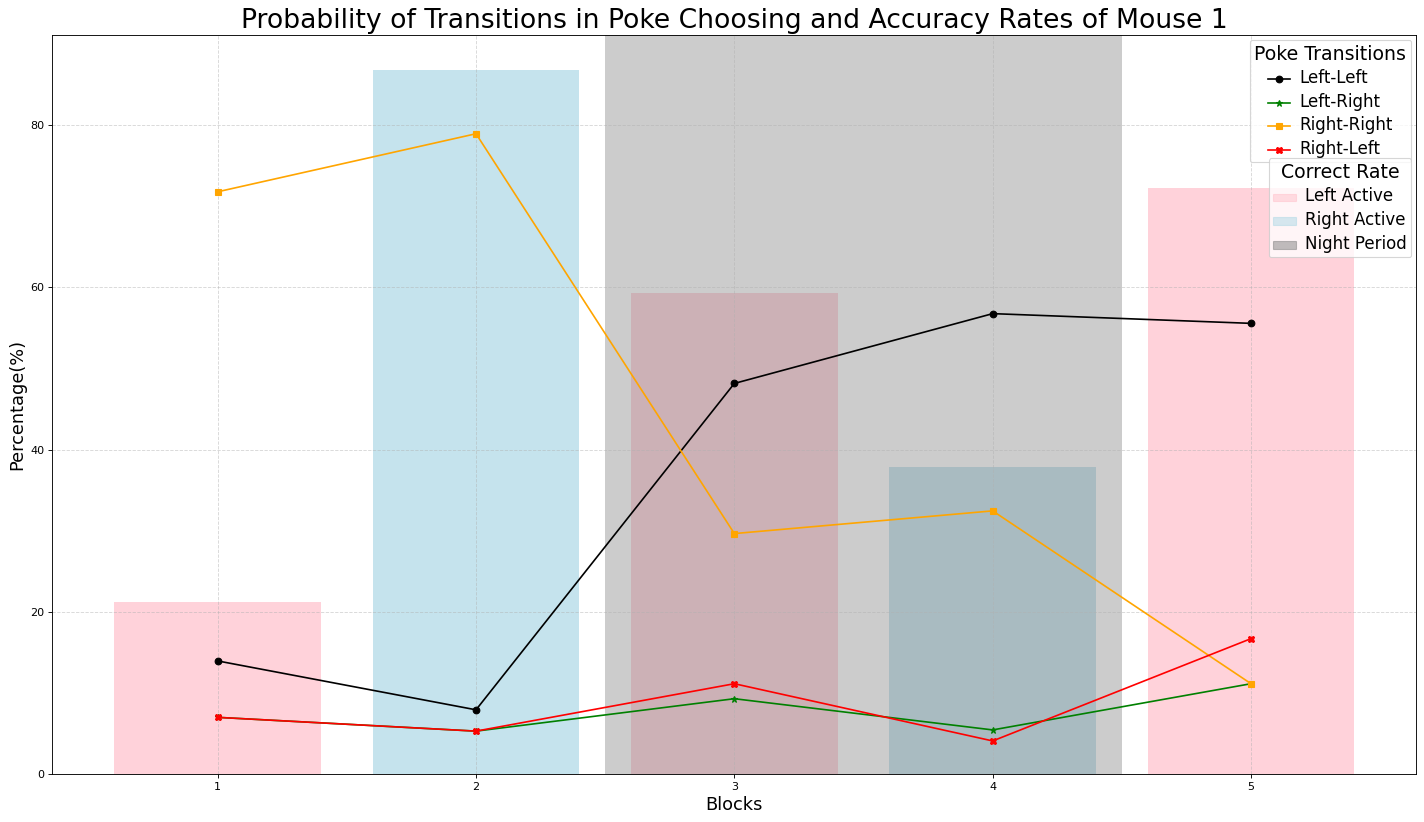

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M2.CSV
/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M3.csv


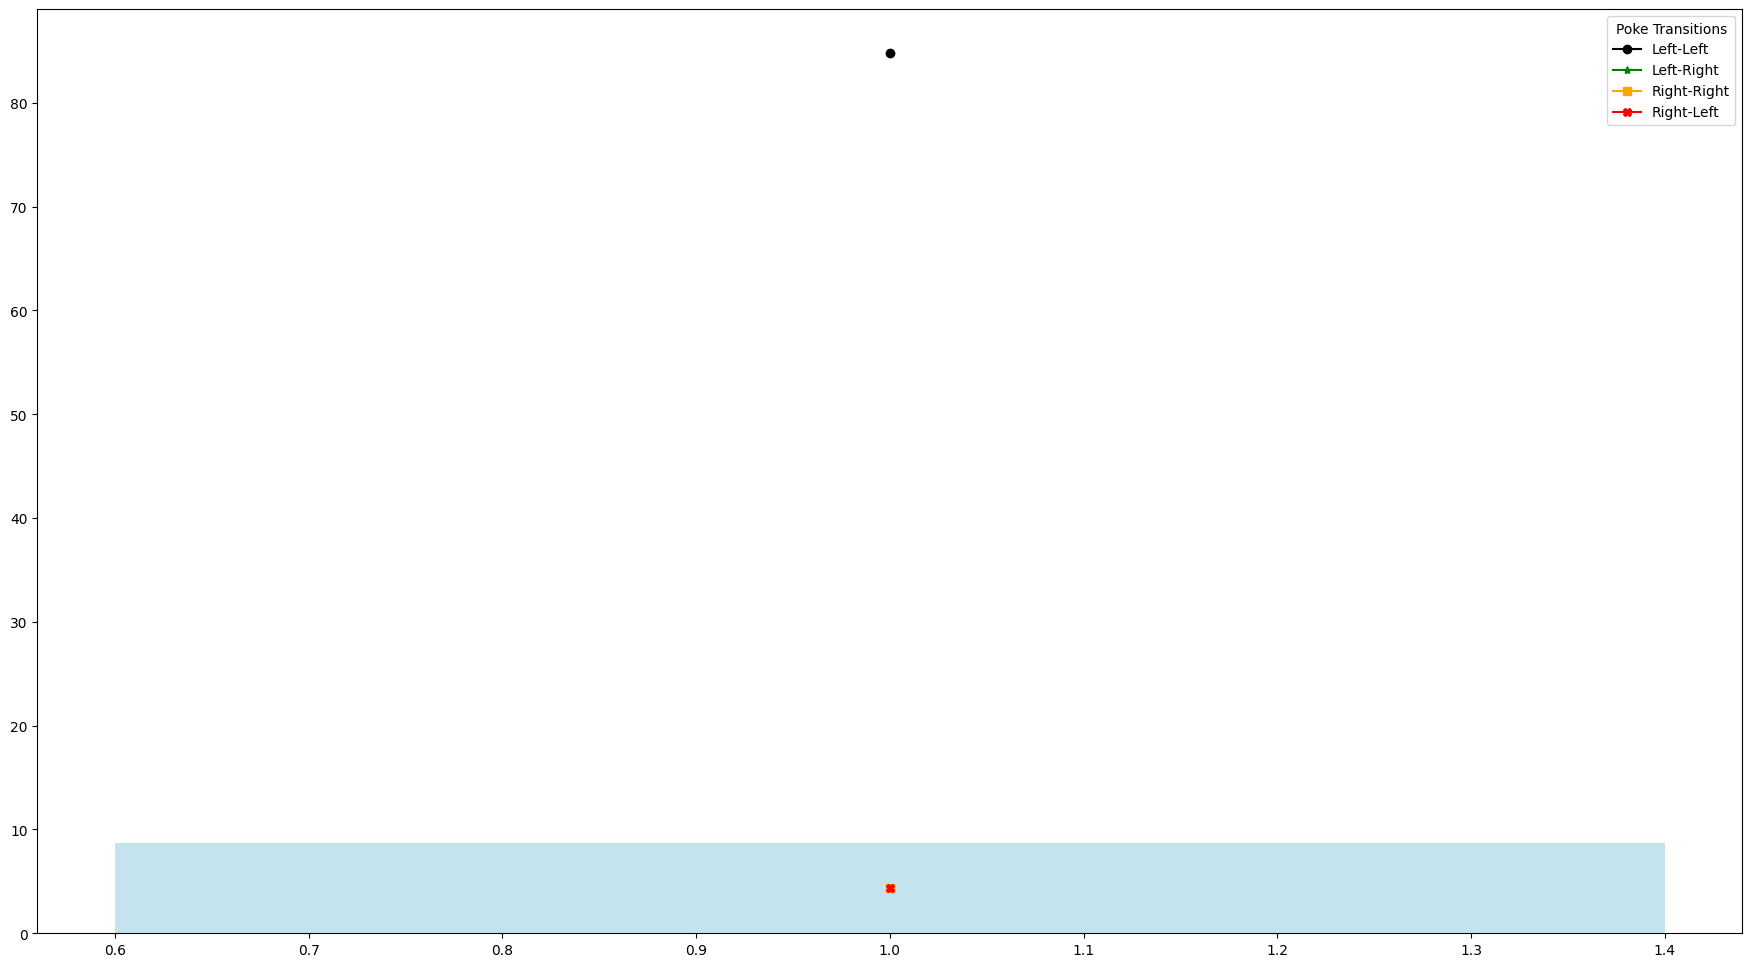

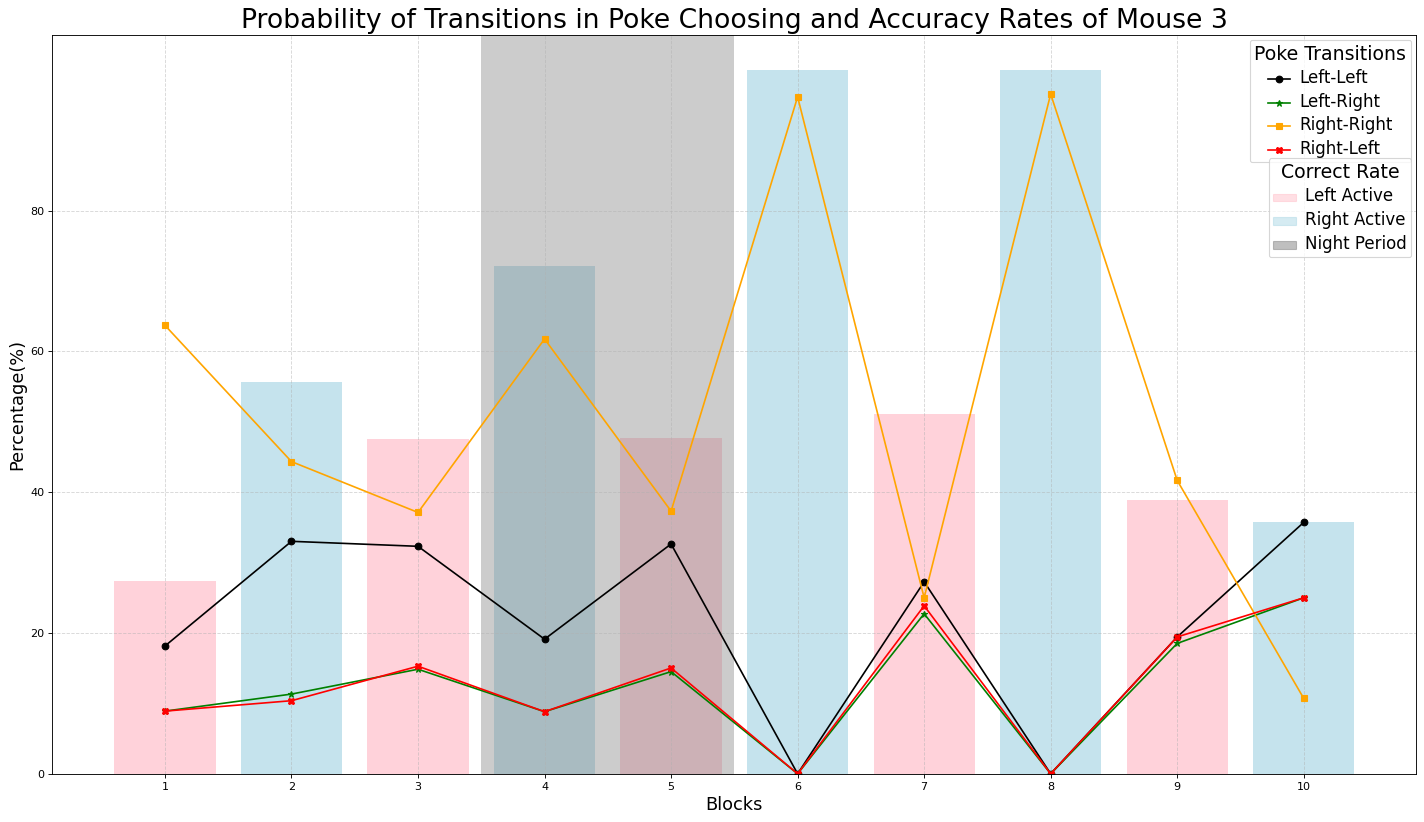

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M4.CSV


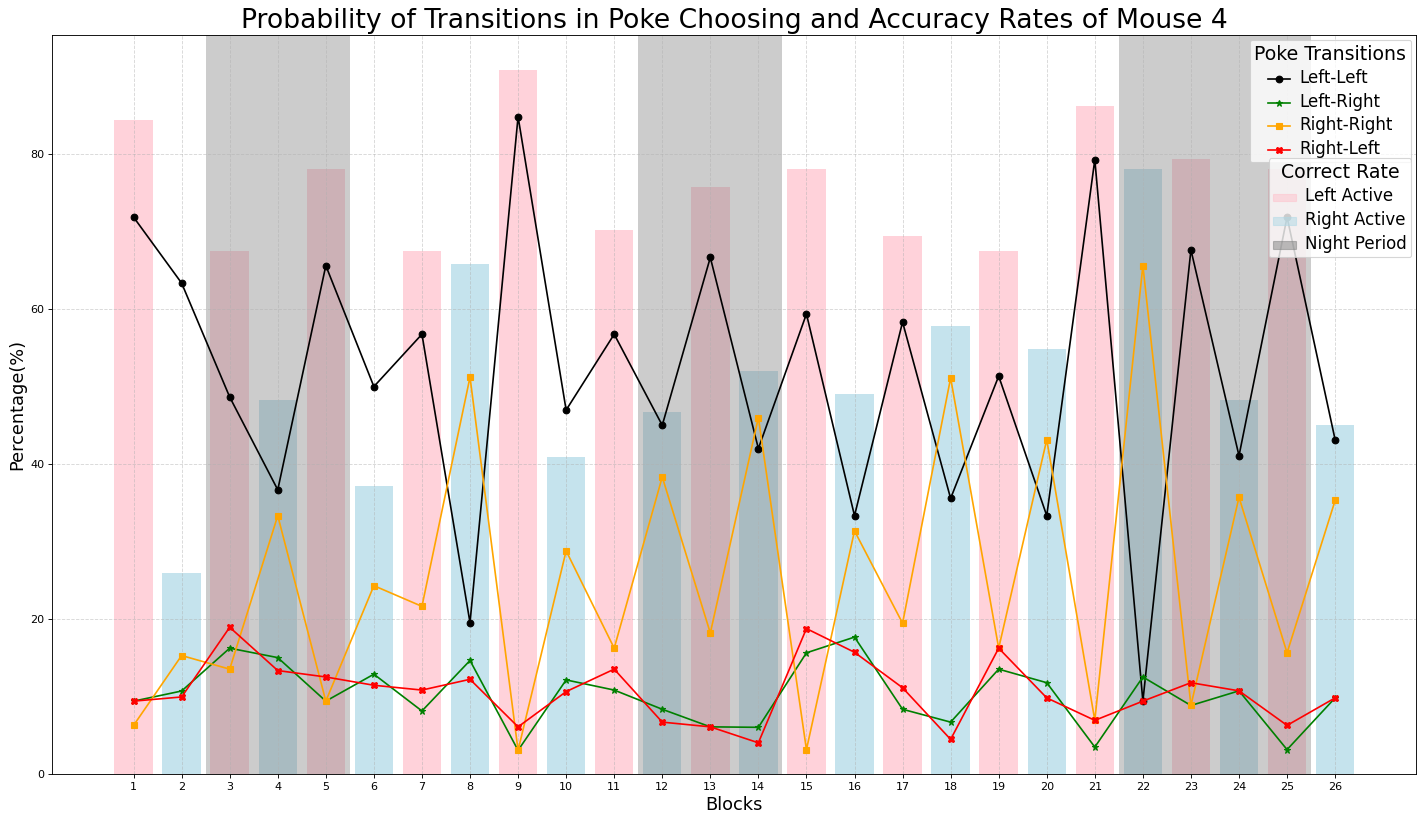

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/mPFC/Fentanyl Tx/Reversal/M5.CSV


../scripts/preprocessing.py:63: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


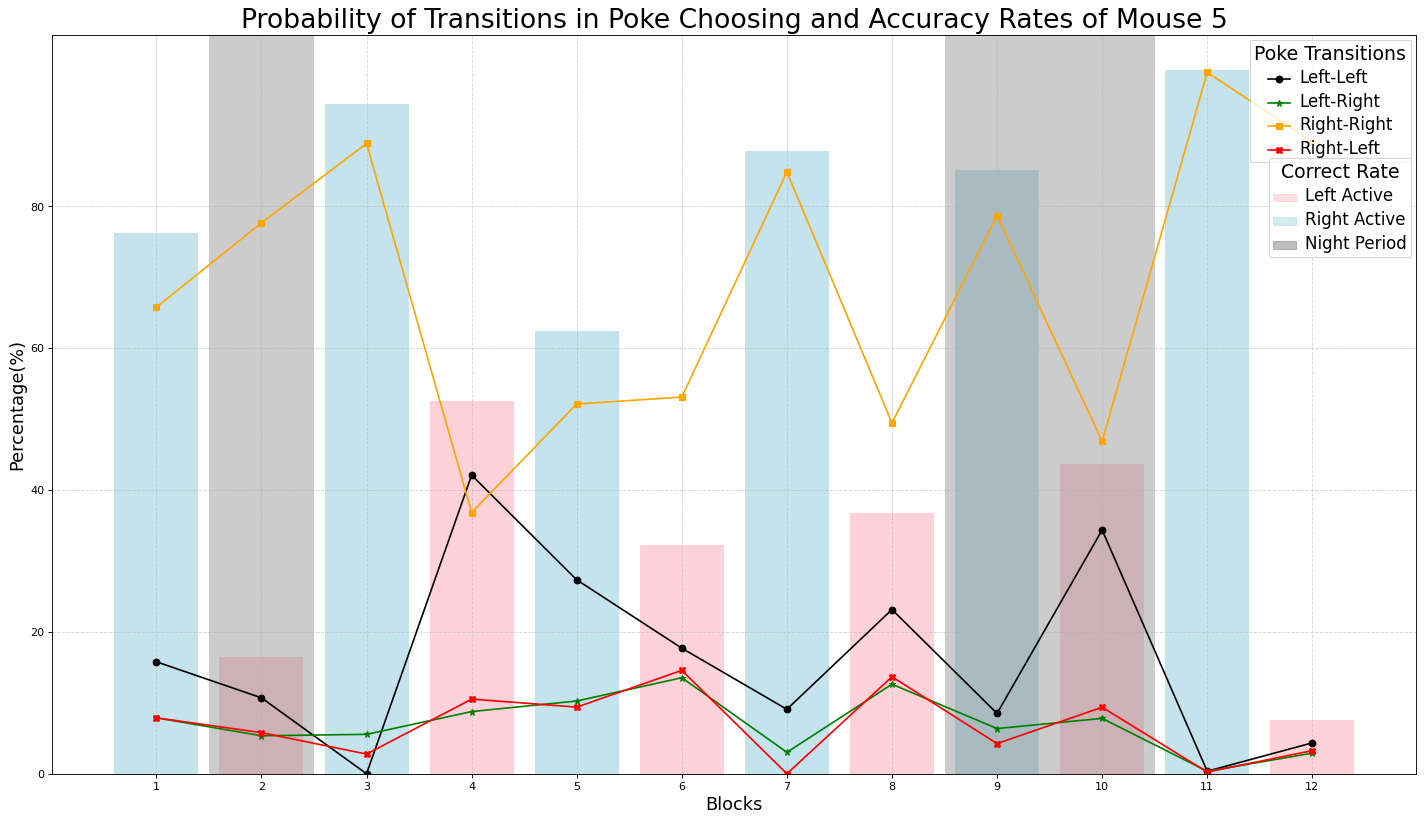

In [2]:
fent_scores = []

for path in paths.reversal_fent:
    print(path)
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    try:
        dit.graph_tranition_stats(data_stats, blocks, path)
    except:
        pass
    acc, grad = dit.block_cumulative_acc(blocks, normalize=True, grad=True)
    fent_scores.append(sum(grad))

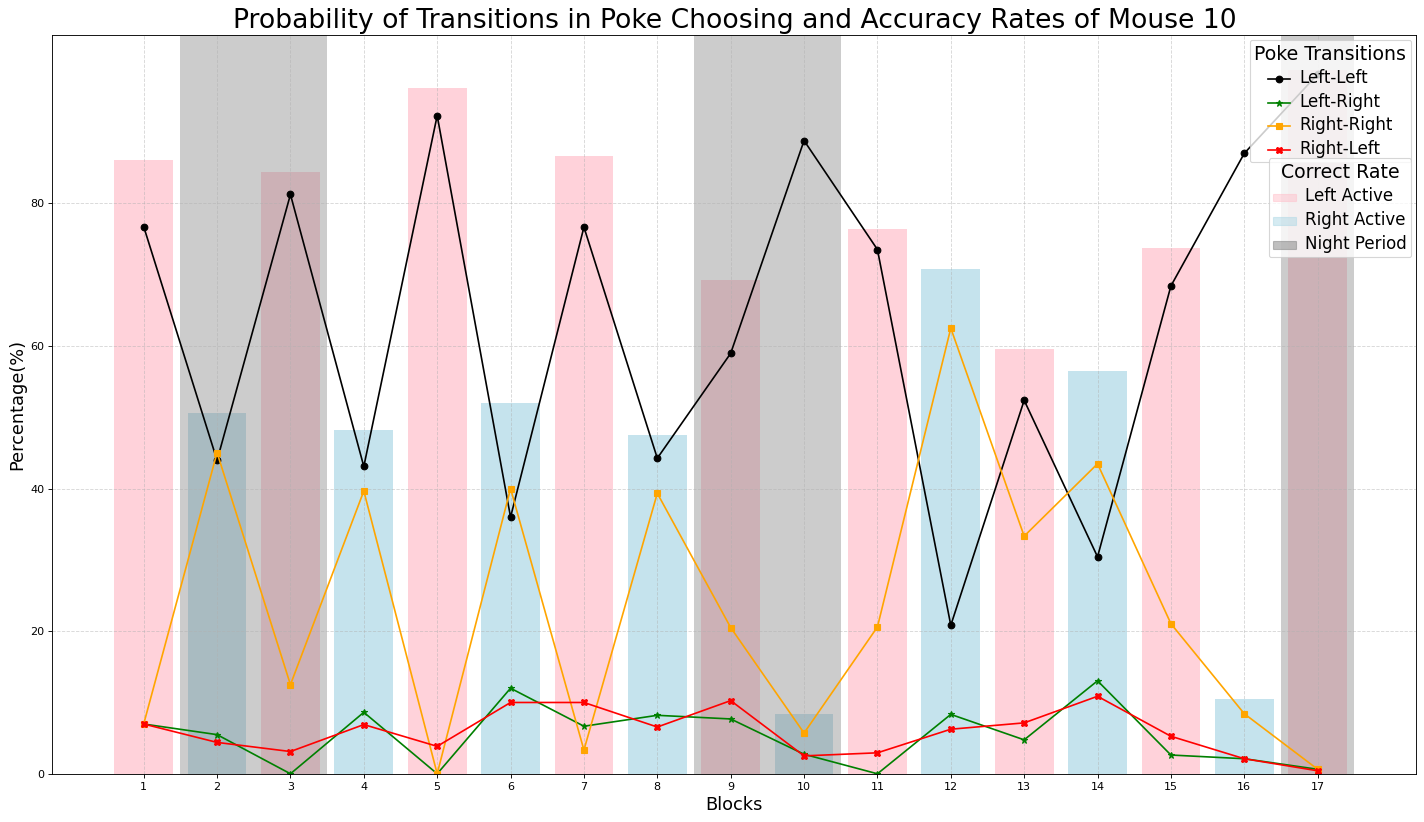

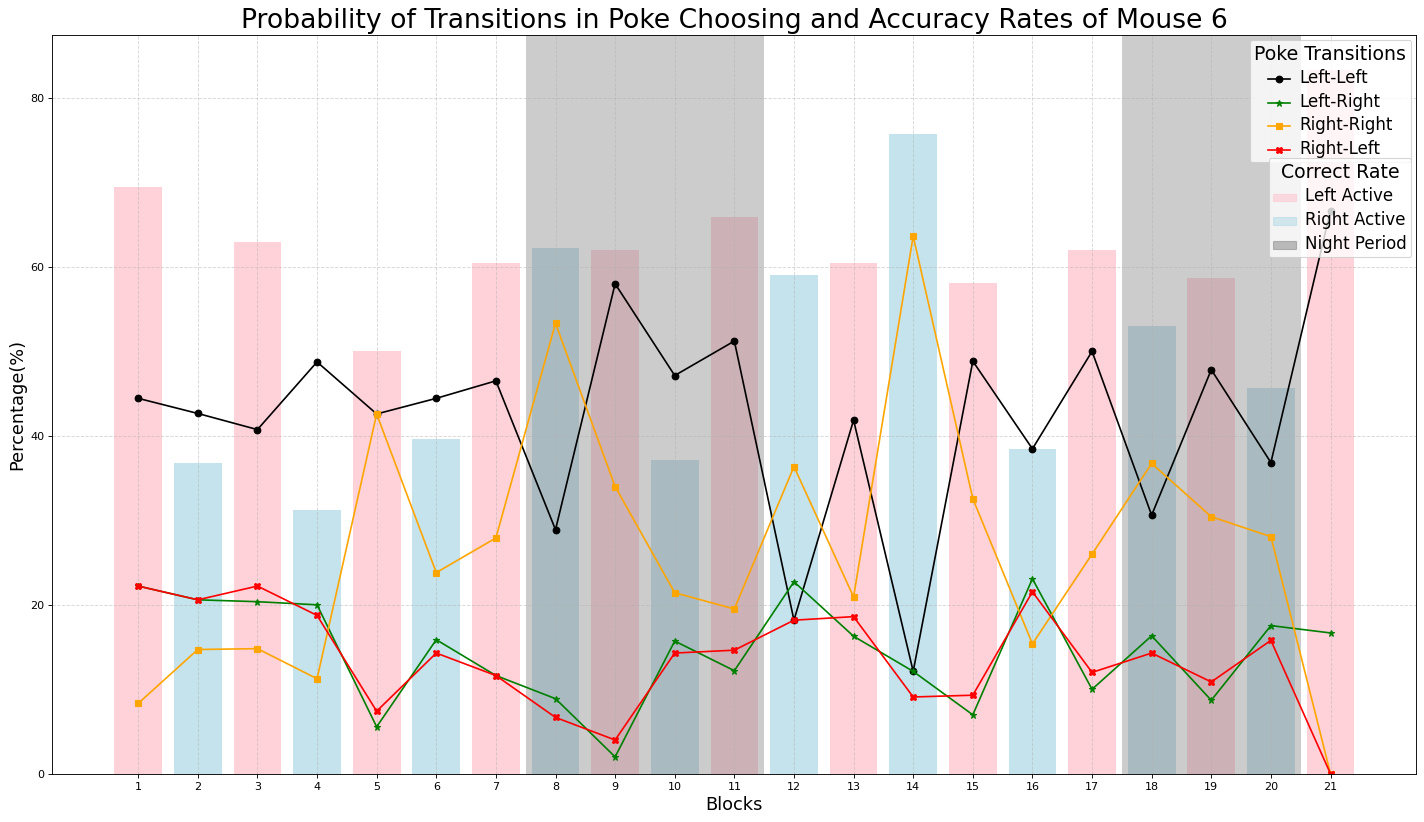

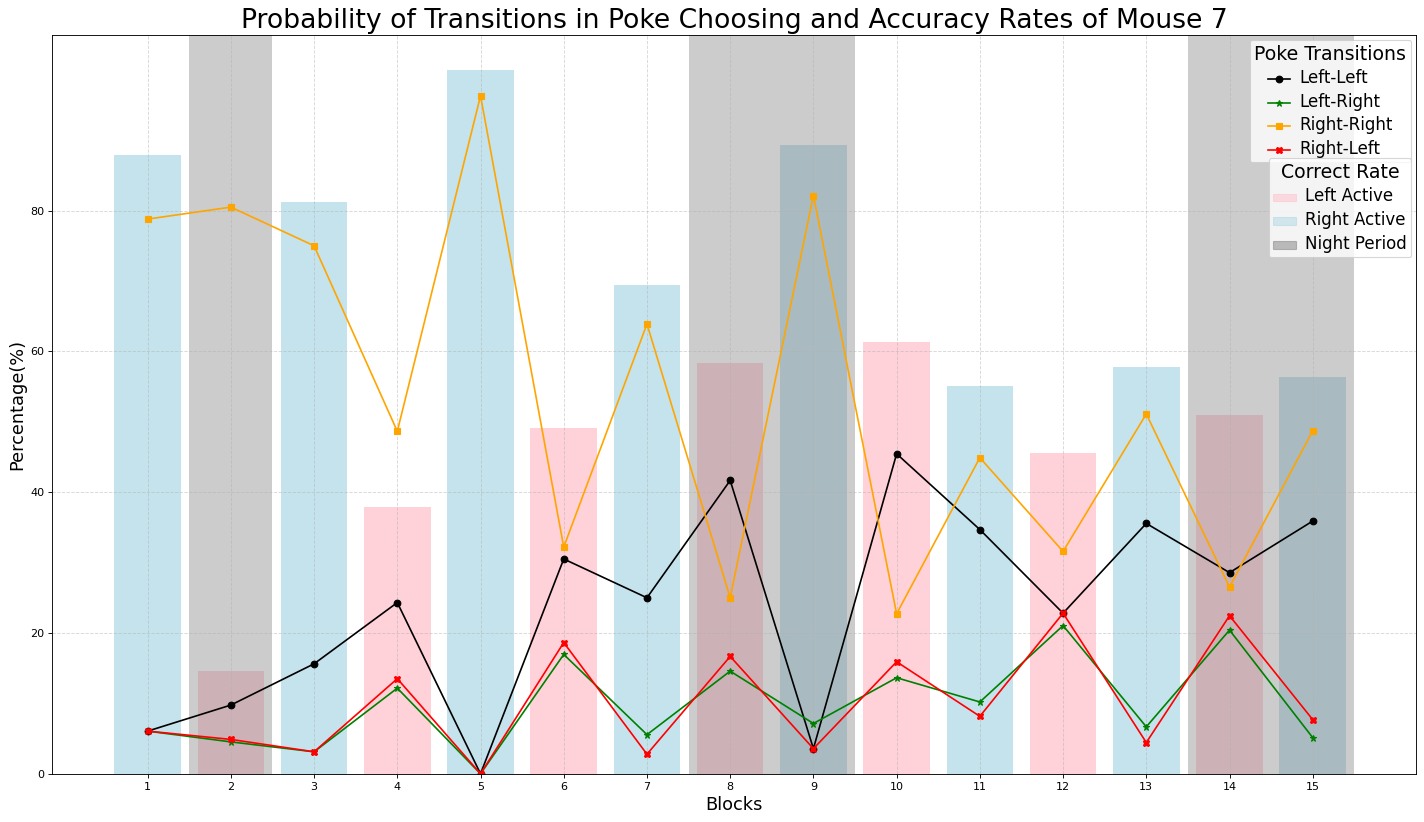

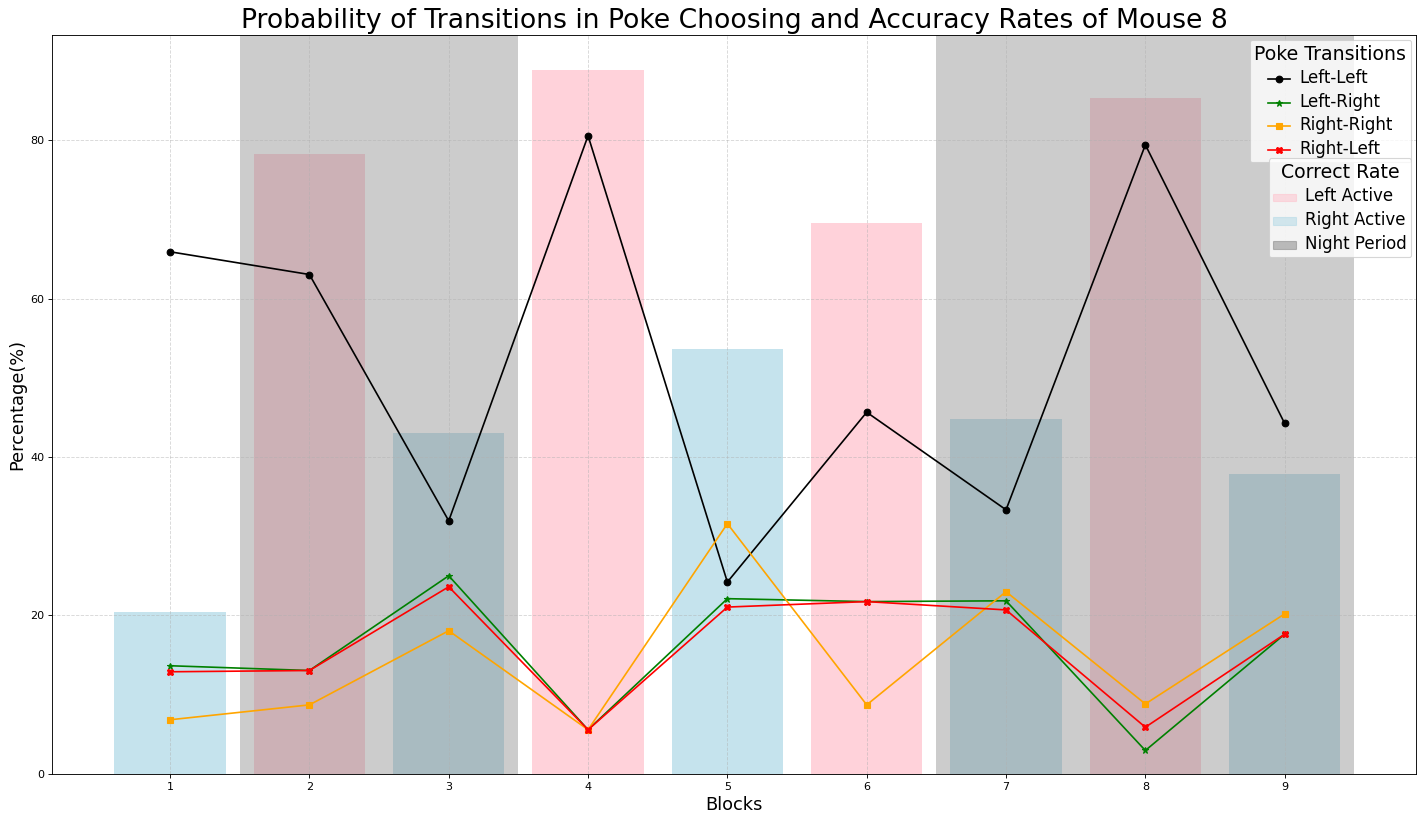

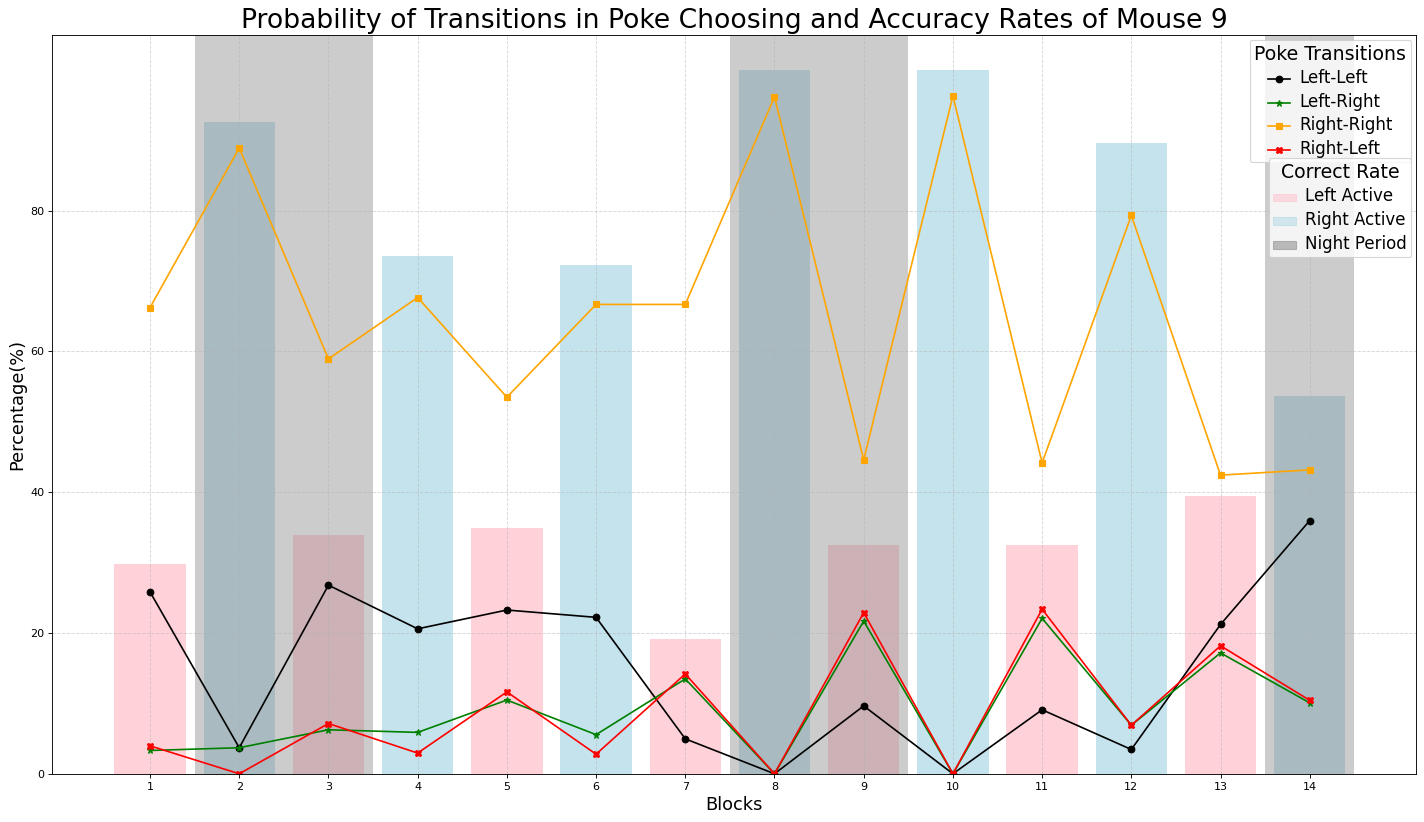

In [3]:
veh_scores = []

for path in paths.reversal_veh:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_stats(data_stats, blocks, path)
    acc, grad = dit.block_cumulative_acc(blocks, normalize=True, grad=True)
    veh_scores.append(sum(grad))

In [4]:
print(fent_scores)
print(veh_scores)

[0.09308842576239257, 0, 0.13046828579916814, -0.10206990933454979, 0.0877463210037242]
[-0.12360254936788212, -0.06155110515160689, -0.1778733385457388, 0.1927530862019279, 0.09037251558273551]


In [5]:
import intervals as invs

In [6]:
invs.perform_T_test(fent_scores, veh_scores, test_side='two-sided')

P Value is  0.4932993157554253
There is no significant difference between the two groups.
